In [46]:
using Pkg
Pkg.activate(".")

# Pkg.add("GraphPlot")

Activating environment at `~/hypergraph-clustering/jl/Project.toml`


In [63]:
youtube

45352×13251 Hypergraph{Int64,Nothing,Nothing,Dict{Int64,Int64}}:
 nothing  1         nothing  nothing  …  nothing  nothing  nothing  nothing
 nothing   nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing  1         nothing  nothing     nothing  nothing  nothing  nothing
 nothing  1         nothing  nothing     nothing  nothing  nothing  nothing
 nothing   nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing   nothing  nothing  nothing  …  nothing  nothing  nothing  nothing
 nothing   nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing   nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing   nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing   nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing   nothing  nothing  nothing  …  nothing  nothing  nothing  nothing
 nothing   nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing   nothing  not

In [65]:
include("./HypergraphClustering.jl")
@time arr1, arr2 = h2correlation(youtube, tf, tfidf)
StatsBase.corkendall(arr1, arr2)

computing...100%|███████████████████████████████████████| Time: 0:00:50


581.432778 seconds (7.63 M allocations: 143.873 GiB, 79.47% gc time)


0.9525650298836348

In [71]:
using Pkg, SimpleHypergraphs, Random, ProgressBars, Plots, ProgressMeter, JLD2, FileIO, PyPlot, ScikitLearn, GraphPlot,StatsBase
@sk_import metrics : f1_score 
@sk_import metrics : accuracy_score
include("HypergraphClustering.jl")
include("./IO.jl")
include("./CreateHypergraph.jl")
rg1 = txt2h("./rg.txt")
rg2 = txt2h("./rg2.txt")

500×50 Hypergraph{Int64,Nothing,Nothing,Dict{Int64,Int64}}:
  nothing  1         1          nothing  …   nothing   nothing   nothing
 1         1         1         1             nothing   nothing   nothing
  nothing  1         1          nothing      nothing   nothing   nothing
 1         1         1         1             nothing   nothing   nothing
 1         1         1          nothing      nothing   nothing   nothing
  nothing   nothing  1         1         …   nothing   nothing   nothing
 1          nothing  1         1             nothing   nothing   nothing
 1         1         1          nothing      nothing   nothing   nothing
 1          nothing  1         1             nothing   nothing   nothing
 1         1         1          nothing     1          nothing  1       
  nothing   nothing   nothing  1         …   nothing   nothing   nothing
 1         1         1         1             nothing   nothing   nothing
 1         1         1         1             nothing   nothing  

In [6]:
youtube = build_youtube()
include("./HypergraphClustering.jl")
# @time uf, ms, part, part_hist = clustering3(youtube, 1, modularity, tfidf)

┣   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱ ┫ 13252it 00:01 [20601.9 it/s]


h2correlation (generic function with 1 method)

In [33]:
tfidf_m = load("./tfidf_ms.jld2", "ms_hists")
okapi_m = load("./okapi_ms.jld2", "ms_hists")
tf_m = load("./tf_ms.jld2", "ms_hists")
idf_m = load("./idf_ms.jld2", "ms_hists")
random_m = load("./random_ms.jld2", "ms_hists")
arr = []
push!(arr, tfidf_m)
push!(arr, okapi_m)
push!(arr, tf_m)
push!(arr, idf_m)
push!(arr, random_m)

arr = reverse.(arr)

5-element Array{Array{Any,1},1}:
 [0.003803305086140506, 0.03798933787677544, 0.07391104455752981, 0.11239852328202009, 0.15179148773163953, 0.19133522827590616, 0.23253880524608175, 0.27804267015333994, 0.3281478940878022, 0.37228636151392697  …  0.21836450468636467, 0.2117891105627221, 0.18981939059673442, 0.1563373433020356, 0.13463900382145097, 0.11949798417300093, 0.0884131689994954, 0.08840512610346883, 0.08838477787393662, 0.0]                          
 [0.003803305086140506, 0.03798933787677544, 0.07391104455752981, 0.11239852328202009, 0.15179148773163953, 0.19133522827590616, 0.23253880524608175, 0.27804267015333994, 0.3281478940878022, 0.3628555162880408  …  0.21179719033355252, 0.2117891105627221, 0.18981939059673442, 0.1563373433020356, 0.13463900382145097, 0.11949798417300093, 0.0884131689994954, 0.08840512610346883, 0.08838477787393662, 0.0]                           
 [0.005388027567362677, 0.048025859329554894, 0.09096507554715044, 0.13360155929524184, 0.1774433315687

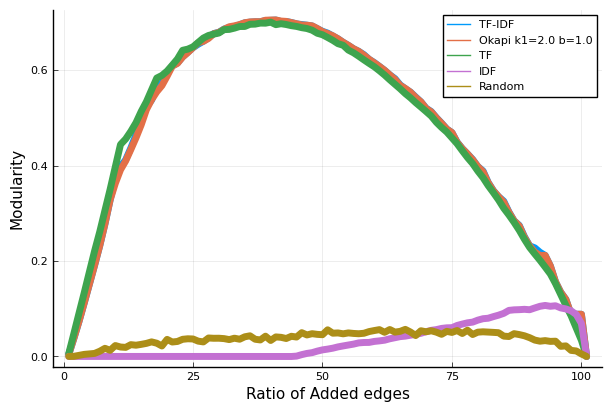

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [34]:
Plots.plot(arr, label=["TF-IDF" "Okapi k1=2.0 b=1.0" "TF" "IDF" "Random"], lw=5, xlabel="Ratio of Added edges", ylabel="Modularity")
Plots.savefig("./youtube_modularity.eps")

In [74]:
# vec1 = [0 for i in 1:length(a1)]
# vec2 = [0 for i in 1:length(a1)]
# vec1[a1[1:100]] .= 1
# vec2[a2[1:100]] .= 1
# f1_score(vec1, vec2)
build_bg(rg2)

2815-element Array{edge,1}:
 edge(436, 541, 0.0944619808736182, 2480)  
 edge(184, 518, 0.09375279610818225, 989)  
 edge(193, 511, 0.0917146918449609, 1025)  
 edge(177, 518, 0.08474246037244526, 961)  
 edge(140, 518, 0.08474246037244526, 769)  
 edge(184, 514, 0.08437751649736402, 988)  
 edge(183, 514, 0.08437751649736402, 986)  
 edge(11, 504, 0.08437751649736402, 78)    
 edge(191, 511, 0.08290023297304426, 1017) 
 edge(152, 511, 0.08290023297304426, 820)  
 edge(108, 511, 0.08290023297304426, 581)  
 edge(475, 542, 0.08272305538957257, 2665) 
 edge(330, 531, 0.08272305538957257, 1829) 
 ⋮                                         
 edge(224, 503, 0.023055629484204056, 1224)
 edge(328, 527, 0.02283089425744622, 1820) 
 edge(224, 529, 0.02271657610943635, 1216) 
 edge(224, 502, 0.02271657610943635, 1204) 
 edge(328, 543, 0.02246849911050263, 1801) 
 edge(200, 543, 0.02246849911050263, 1072) 
 edge(334, 502, 0.022218023878911627, 1850)
 edge(328, 538, 0.022117428811901027, 1816)
 edg

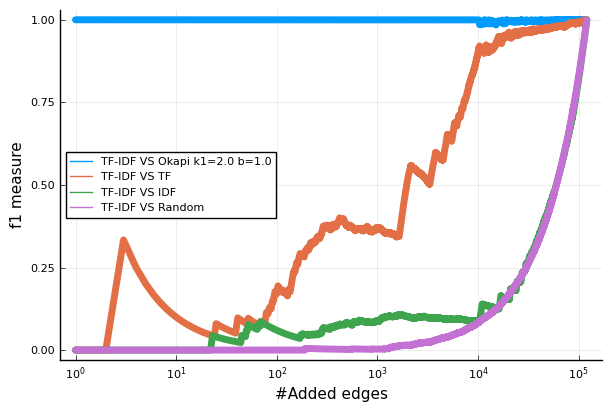

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [78]:
# h1 = Hypergraph{Float64, Int, String}(6,9)
# h1[1:3,1] .= 1
# h1[1:2,2] .= 1
# h1[2:3,3] .= 1
# h1[1, 4] = 1
# h1[3, 4] = 1
# h1[3:4, 5] .= 1
# h1[4:6,6] .= 1
# h1[4:5,7] .= 1
# h1[5:6, 8] .= 1
# h1[4, 9] = 1
# h1[6, 9] = 1
# h1[3, 5:9] .= 1
# # SimpleHypergraphs.draw(h1, GraphBased, width=500, with_node_labels=true, with_he_labels=true, radius=20, stroke_width=10)
# # SimpleHypergraphs.draw(h1, GraphBased)
# dr
pyplot()
Plots.plot(cs, label=permutedims(plot_names), lw=5, xlabel="#Added edges", ylabel="f1 measure", xscale=:log10)
Plots.savefig("./images/youtube_log_curve.eps")

In [7]:
w = build_bg(rg, tfidf)
function comp(x, y)
    if(x.from == y.from) return x.to < y.to end
    return x.from < y.from
end


w = [i.weight for i in sort(w, lt=comp)]
w = round.(w, digits=2)

2759-element Array{Float64,1}:
 0.06
 0.06
 0.07
 0.06
 0.06
 0.06
 0.06
 0.06
 0.06
 0.06
 0.06
 0.06
 0.06
 ⋮   
 0.07
 0.06
 0.06
 0.07
 0.06
 0.07
 0.08
 0.07
 0.07
 0.06
 0.09
 0.06

In [28]:
b = BipartiteView(rg)
bv = LightGraphs.SimpleGraph(b)

c = vcat(["orange" for i in 1:nhv(rg)], ["lightseagreen" for i in 1:nhe(rg)])
labels = vcat(string.("v", string.(1:nhv(rg))), string.("he", string.(1:nhe(rg))))

# gplot(bv, nodelabel=labels, nodefillc=c, edgelabel=w)

550-element Array{String,1}:
 "v1"  
 "v2"  
 "v3"  
 "v4"  
 "v5"  
 "v6"  
 "v7"  
 "v8"  
 "v9"  
 "v10" 
 "v11" 
 "v12" 
 "v13" 
 ⋮     
 "he39"
 "he40"
 "he41"
 "he42"
 "he43"
 "he44"
 "he45"
 "he46"
 "he47"
 "he48"
 "he49"
 "he50"

0.5

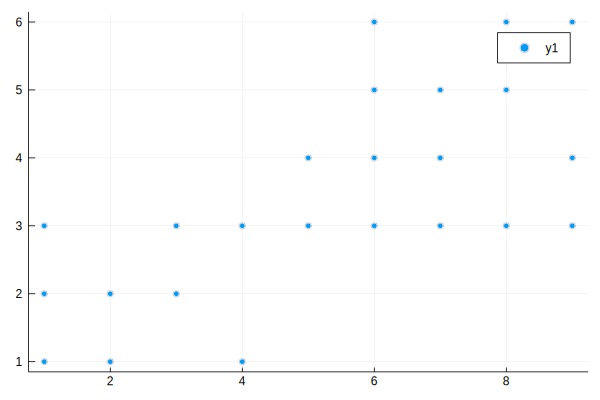

In [100]:
vi = visu(h1)
Plots.scatter(vi)

In [6]:
include("./ClusteringUtil.jl")
bg = build_bg(rg, tfidf)
function comp(x, y)
    if(x.from == y.from) return x.to < y.to end
    return x.from < y.from
end

w = [round(i.weight,digits=2) for i in sort(bg, lt=comp)]

2759-element Array{Float64,1}:
 0.06
 0.06
 0.07
 0.06
 0.06
 0.06
 0.06
 0.06
 0.06
 0.06
 0.06
 0.06
 0.06
 ⋮   
 0.07
 0.06
 0.06
 0.07
 0.06
 0.07
 0.08
 0.07
 0.07
 0.06
 0.09
 0.06

In [189]:
# @time const trim_cookpad = build_trimcookpad("../ingredients_trim15.blbl")

In [63]:
include("./CreateHypergraph.jl")
include("./ClusteringUtil.jl")
# 1clusterのnode number
a = [100 for i in 1:5]
# 1clusterのhe number
b = [10 for i in 1:5]

rg2, noise, tr_data = create_hypergraph(a, b, 0.5, 0.02)
h2txt(rg2, "rg2.txt")

In [129]:
include("./ClusteringUtil.jl")
noise_node = [true in i for i in noise]
edges = build_bg(rg, tfidf)
order = noise_order(edges, noise)
tmp = [noise_node[i.from] ? 1 : 0 for i in edges]
[i[1] for i in enumerate(noise_node)][noise_node .== 1]
# Plots.plot(tmp)
# Plots.plot(order, xlabel="#noise node", ylabel="#order")

6-element Array{Int64,1}:
  10
  19
 143
 215
 329
 414

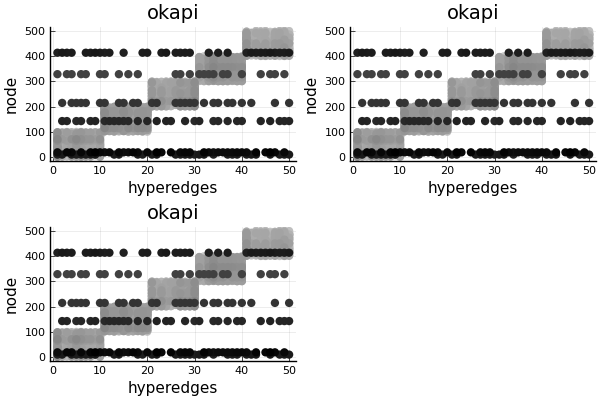

In [42]:
include("./ClusteringUtil.jl")
p_arr = []
for i in 0:0.5:1
    push!(p_arr, plot_incidence(rg, "okapi", okapi))
end

Plots.plot(p_arr...)

In [47]:
Plots.savefig("./test.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [43]:
include("./ClusteringUtil.jl")
# params = Dict("k1"=> 2.0, "b"=>0.75)
arr = []
for b in 0:0.5:1.0
    params = Dict("k1"=>2.0, "b"=>b)
    push!(arr, plot_incidence(rg, "okapi", okapi, params))
    params = Dict("k1"=>1.2, "b"=>b)
    push!(arr, plot_incidence(rg, "okapi", okapi, params))
end

In [79]:
# Plots.plot(arr..., size=(1000, 500))

In [80]:
include("./ClusteringUtil.jl")
p_arr = []
push!(p_arr, plot_incidence(rg2, "IDF", idf))
push!(p_arr, plot_incidence(rg2, "TF", tf))
push!(p_arr, plot_incidence(rg2, "TF-IDF", tfidf))
push!(p_arr, plot_incidence(rg2, "Random", random_weight))
push!(p_arr, plot_incidence(rg2, "Okapi", okapi, Dict("k1"=>2.0, "b"=>0.75)))

# Plots.plot(p_arr..., size=(1500, 600))

5-element Array{Any,1}:
 Plot{Plots.PyPlotBackend() n=1}
 Plot{Plots.PyPlotBackend() n=1}
 Plot{Plots.PyPlotBackend() n=1}
 Plot{Plots.PyPlotBackend() n=1}
 Plot{Plots.PyPlotBackend() n=1}

In [29]:
include("./ClusteringUtil.jl")
tr_data = Set.([1:100, 101:200, 201:300, 301:400, 401:500])
# plot_incidence(rg, "TF-IDF")

5-element Array{Set{Int64},1}:
 Set([2, 89, 11, 29, 74, 57, 31, 78, 70, 33  …  98, 19, 51, 22, 6, 24, 73, 53, 23, 27, 56])                       
 Set([197, 134, 158, 136, 160, 151, 131, 144, 142, 173  …  161, 186, 119, 191, 156, 177, 116, 123, 163, 108, 164])
 Set([288, 241, 215, 249, 207, 300, 289, 201, 283, 285  …  273, 291, 268, 281, 243, 222, 277, 271, 255, 218, 276])
 Set([329, 306, 370, 365, 391, 400, 342, 384, 375, 318  …  321, 378, 389, 312, 317, 358, 305, 315, 322, 349, 301])
 Set([491, 464, 478, 499, 477, 435, 494, 448, 490, 407  …  415, 420, 454, 423, 424, 427, 446, 485, 498, 405, 496])

In [52]:
include("./HypergraphClustering.jl")
include("./ClusteringUtil.jl")
@time uf,ms, part, part_hist = clustering3(rg, 1, modularity, idf)

computing...100%|███████████████████████████████████████| Time: 0:00:01


  2.315500 seconds (12.57 M allocations: 573.872 MiB, 20.40% gc time)


(UnionFind{Int64}([481, 481, 481, 481, 481, 481, 481, 481, 481, 481  …  481, 481, 481, 481, 481, 481, 481, 481, 481, 481]), Any[-2.142468242520785e-84, -2.142468242520785e-84, -2.142468242520785e-84, -2.142468242520785e-84, -2.142468242520785e-84, -2.142468242520785e-84, -2.142468242520785e-84, -2.142468242520785e-84, -2.142468242520785e-84, -2.142468242520785e-84  …  -0.2055565414593314, -0.2055565414593314, -0.2055565414593314, -0.2055565414593314, -0.2055565414593314, -0.2055565414593314, -0.2055565414593314, -0.2055565414593314, -0.2055565414593314, 0.0], Set{Int64}[Set([288, 306, 29, 300, 289, 74, 435, 176, 57, 285  …  341, 186, 321, 420, 6, 423, 271, 23, 315, 322, 218])], Any[Set{Int64}[Set([288]), Set([306]), Set([11]), Set([491]), Set([134]), Set([158]), Set([160]), Set([215]), Set([464]), Set([29])  …  Set([23]), Set([498]), Set([305]), Set([315]), Set([322]), Set([349]), Set([27]), Set([496]), Set([218]), Set([56])], Set{Int64}[Set([288]), Set([306]), Set([11]), Set([491]), S

142.021026 seconds (674.78 M allocations: 81.715 GiB, 12.11% gc time)


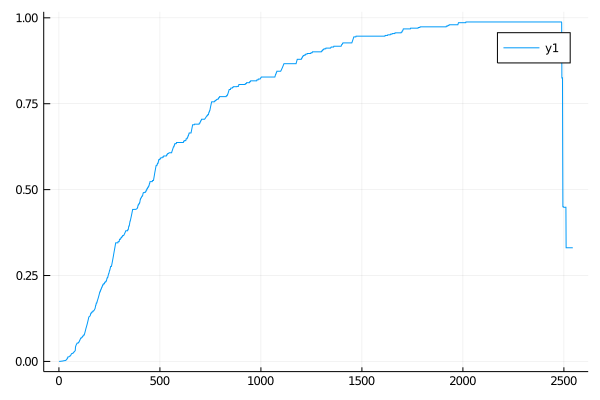

In [62]:
scores = []
@time push!(scores,scoring.(part_hist, Ref(tr_data), Ref(f1_score)))

Plots.plot(scores)

In [130]:
# @time push!(scores,scoring.(part_hist, Ref(tr_data), Ref(f1_score)))
# pyplot()
Plots.plot(scores, label=["TFIDF" "TF" "Random" "Okapi" "IDF"], lw=5, xlabel="#added edges", ylabel="f1 measure", title="F1 measures")

UndefVarError: UndefVarError: scores not defined

In [30]:
include("./HypergraphClustering.jl")
include("./ClusteringUtil.jl")
scores2 = []
for b in 0:0.5:1
    params = Dict("k1"=>1.2, "b"=>b)
    uf,ms, part, part_hist = clustering3(rg, 1, modularity, okapi, params)
    push!(scores2,scoring.(part_hist, Ref(tr_data), Ref(f1_score)))
    params = Dict("k1"=>2.0, "b"=>b)
    uf,ms, part, part_hist = clustering3(rg, 1, modularity, okapi, params)
    push!(scores2,scoring.(part_hist, Ref(tr_data), Ref(f1_score)))
end


computing...100%|███████████████████████████████████████| Time: 0:00:01
computing...100%|███████████████████████████████████████| Time: 0:00:01
computing...100%|███████████████████████████████████████| Time: 0:00:01
computing...100%|███████████████████████████████████████| Time: 0:00:01
computing...100%|███████████████████████████████████████| Time: 0:00:01
computing...100%|███████████████████████████████████████| Time: 0:00:01


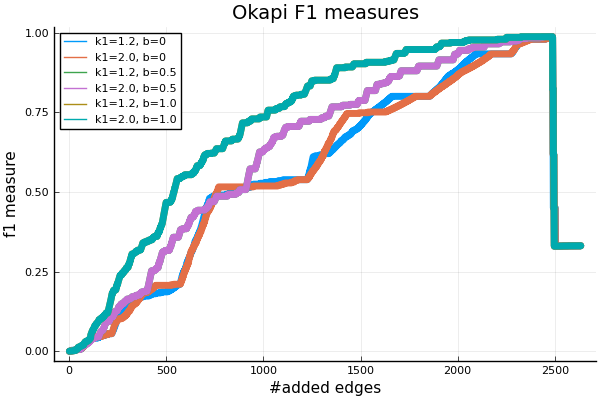

In [31]:
pyplot()
Plots.plot(scores2, label=["k1=1.2, b=0" "k1=2.0, b=0" "k1=1.2, b=0.5" "k1=2.0, b=0.5" "k1=1.2, b=1.0" "k1=2.0, b=1.0"], lw=5, xlabel="#added edges", ylabel="f1 measure", title="Okapi F1 measures")


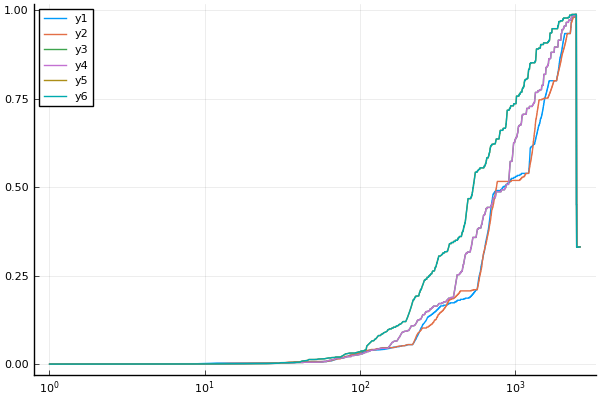

In [147]:
Plots.plot(scores2, xscale=:log10)

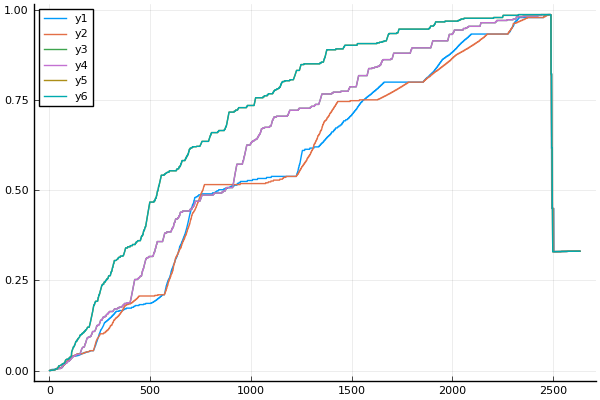

In [151]:
Plots.plot(scores2)

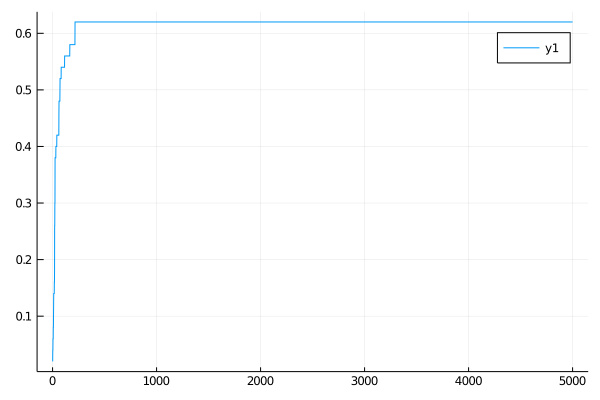

In [81]:
cfm = CFModularityCNMLike(5000)
bm, bp, hist = findcommunities(rg, cfm)

Plots.plot(hist)

In [41]:
scoring(part, tr_data, f1_score)
scoring(part, tr_data, accuracy_score)

0.9944529058116233

In [43]:
include("./HypergraphClustering.jl")
# act_sc = part2is_samecluster(tr_data)
# pred_sc = part2is_samecluster(part)
# jl_sc = part2is_samecluster(bp)
# jl_fscore = f1_score(act_sc, jl_sc)
# jl_acc = accuracy_score(act_sc, jl_sc)
# fscore = f1_score(act_sc, pred_sc)
# acc = accuracy_score(act_sc, pred_sc)



@time arr1, arr2 = h2correlation(rg, tfidf, general_weight)
using StatsBase
# スピアマン ケンドール
StatsBase.corspearman(arr1, arr2), StatsBase.corkendall(arr1, arr2)

  0.536300 seconds (963.25 k allocations: 54.130 MiB, 4.78% gc time)


(0.6503325997278955, 0.49466836458129115)

In [64]:
ϕₛ = []
for subset in part
    ϕ = conductance(rg, subset)
    if !isnan(ϕ) append!(ϕₛ, (ϕ, subset)); end
#     println(conductance(rg, subset))
end

In [110]:
include("./ClusteringUtil.jl")
cs = []
plot_names = []
indicator_names = ["TF" "IDF" "TFIDF" "Random" "Okapi k1=2.0 b=0.75"]
indicators = [tf, idf, tfidf, random_weight, okapi]
p = 1
for i in 1:5
    for j in i+1:5
        if i == j continue end
        name1 = indicator_names[i]
        name2 = indicator_names[j]
        ind1 = indicators[i]
        ind2 = indicators[j]
        push!(cs, curve(rg, ind1, ind2))
#         plot_names[p] = "$name1 $name2"
#         p += 1
        push!(plot_names, "$name1 $name2")
    end
end
    

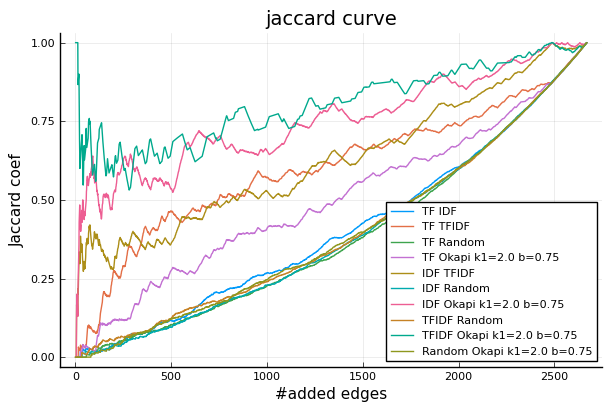

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [129]:
pyplot()
Plots.plot(cs, label=permutedims(plot_names), title="jaccard curve", xlabel="#added edges", ylabel="Jaccard coef")
# permutedims(plot_names)
Plots.savefig("./images/jaccard_curve.eps")

In [70]:
conductance(union(Set(1:50), Set(300:350))

Set([329, 2, 306, 11, 39, 46, 25, 42, 29, 8  …  23, 305, 315, 322, 349, 27, 331, 301, 41, 15])

In [37]:
include("HypergraphClustering.jl")
# @time build_bg(cookpad)
@time arr1, arr2 = h2correlation(rg, tfidf, general_weight)
# @time arr1, arr2 = h2correlation(cookpad)

  0.687074 seconds (1.15 M allocations: 69.093 MiB, 2.98% gc time)


([1429, 3897, 3267, 3300, 3596, 4015, 3372, 298, 1734, 3410  …  4633, 7932, 7323, 7602, 7322, 9167, 7931, 9502, 7505, 6765], [2773, 11555, 5583, 6453, 9713, 11867, 8215, 615, 2593, 3865  …  3042, 7332, 5585, 6745, 5584, 9108, 7331, 10018, 6454, 4430])

In [41]:
using StatsBase
# スピアマン ケンドール
corspearman(arr1, arr2), corkendall(arr1, arr2)

(0.7546161791462117, 0.585661867767498)